In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import files 
import io

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_csv("qsar_aquatic_toxicity.csv")

In [ ]:
df.head()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,"quantitative response, LC50 [-LOG(mol/L)]",Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740,NaN,NaN,NaN
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330,NaN,NaN,NaN
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019,NaN,NaN,NaN
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723,NaN,NaN,NaN
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979,NaN,NaN,NaN


In [ ]:
df.tail()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,"quantitative response, LC50 [-LOG(mol/L)]",Unnamed: 9,Unnamed: 10,Unnamed: 11
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651,NaN,NaN,NaN
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953,NaN,NaN,NaN
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219,NaN,NaN,NaN
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995,NaN,NaN,NaN
545,0.00,0.000,0,2.255,1.800,0.917,0,0,2.480,NaN,NaN,NaN


In [ ]:
df.shape

(546, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   TPSA(Tot)                                  546 non-null    float64
 1   SAacc                                      546 non-null    float64
 2   H-050                                      546 non-null    int64  
 3    MLOGP                                     546 non-null    float64
 4   RDCHI                                      546 non-null    float64
 5   GATS1p                                     546 non-null    float64
 6   nN                                         546 non-null    int64  
 7    C-040                                     546 non-null    int64  
 8   quantitative response, LC50 [-LOG(mol/L)]  546 non-null    float64
 9   Unnamed: 9                                 0 non-null      float64
 10  Unnamed: 10               

In [ ]:
df.describe()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,"quantitative response, LC50 [-LOG(mol/L)]",Unnamed: 9,Unnamed: 10,Unnamed: 11
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,0.0,0.0,0.0
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421,NaN,NaN,NaN
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000,NaN,NaN,NaN
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500,NaN,NaN,NaN
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000,NaN,NaN,NaN
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500,NaN,NaN,NaN
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000,NaN,NaN,NaN


In [ ]:
# There are no null values
df.isnull().sum()

TPSA(Tot)                                      0
SAacc                                          0
H-050                                          0
 MLOGP                                         0
RDCHI                                          0
GATS1p                                         0
nN                                             0
 C-040                                         0
quantitative response, LC50 [-LOG(mol/L)]      0
Unnamed: 9                                   546
Unnamed: 10                                  546
Unnamed: 11                                  546
dtype: int64

In [ ]:
df.columns

Index(['TPSA(Tot)', 'SAacc', 'H-050', ' MLOGP', 'RDCHI', 'GATS1p', 'nN',
       ' C-040', 'quantitative response, LC50 [-LOG(mol/L)]', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [ ]:
sns.pairplot(df, hue="quantitative response, LC50 [-LOG(mol/L)]", diag_kind="hist", height=1.6);

In [ ]:
# Fitting the linear model

In [ ]:
# Defining the Dependant and Independent Variables
x = df.drop(["quantitative response, LC50 [-LOG(mol/L)]"],axis=1)
y = df["quantitative response, LC50 [-LOG(mol/L)]"]

In [ ]:
# Scaling the Numeric columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [ ]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [ ]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.5801916317140448


In [ ]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -5.489515652082064e-15


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


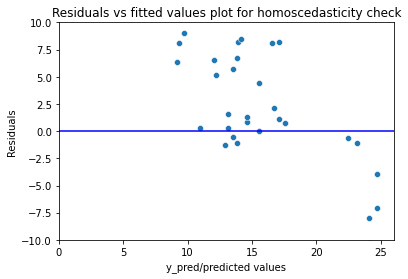

In [ ]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
# Goldfeld Quandt Test

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.6809841148323865), ('p-value', 0.0008244581495605941)]

In [ ]:
from scipy.stats import bartlett
test = bartlett(X_train[0],residuals)
print(test)

BartlettResult(statistic=22.563286370504226, pvalue=2.0333340126536572e-06)


In [ ]:
from scipy.stats import bartlett
test = bartlett(X_train[1],residuals)
print(test)

BartlettResult(statistic=16.24854391719443, pvalue=5.5552271553487554e-05)


In [ ]:
from scipy.stats import bartlett
test = bartlett(X_train[2],residuals)
print(test)

BartlettResult(statistic=18.651653336130455, pvalue=1.5691114521425064e-05)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


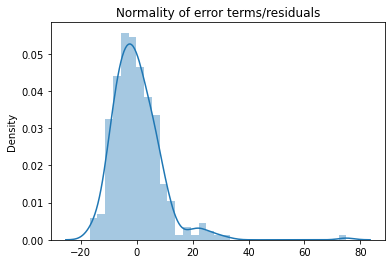

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


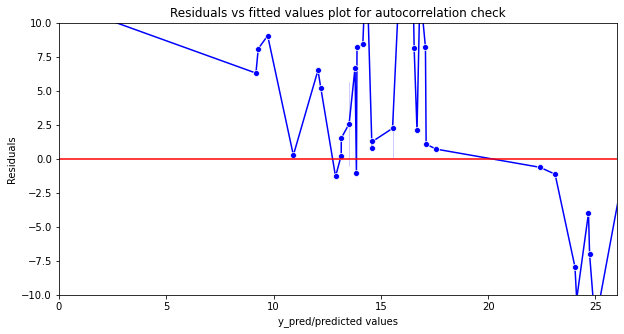

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [ ]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])
#Since p value is greater than 0.05 we cannot reject the null hypothesis.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.05453552423315533

In [ ]:
import statsmodels.api as sm

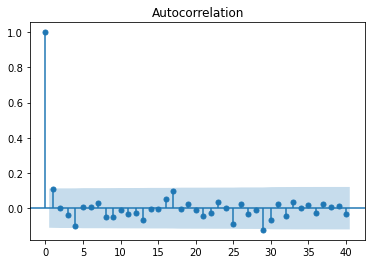

In [ ]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

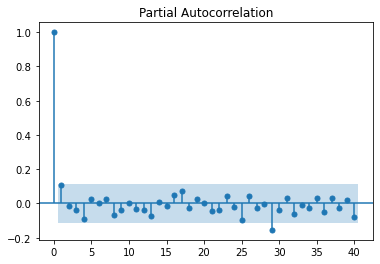

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

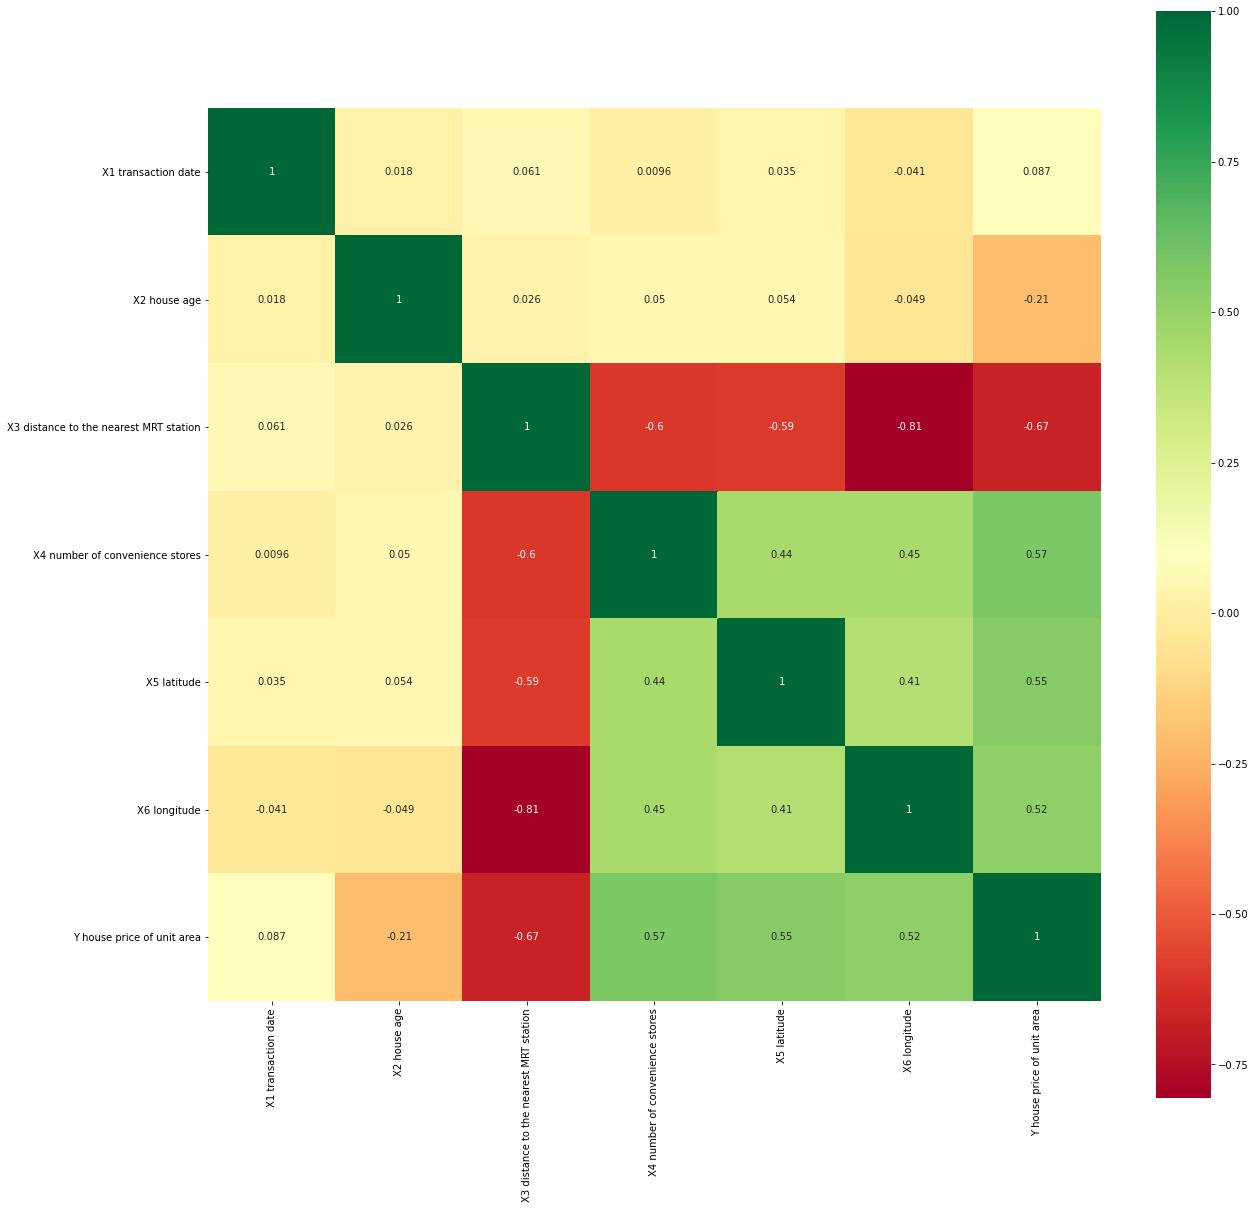

In [ ]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [ ]:
## Some other model evaluations

In [ ]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 0.9960789214168067
R squared: 0.9960789214168067


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9534505132219506
R squared: 0.9534505132219506


In [ ]:
# SVM

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.6004943991969595
R squared: 0.6004943991969595
